# Loan Approval Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1. Probulem Statement
The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, tenure, cibil score, education, assests and many other variables. Thorugh this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

### About the dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

## 2. Data Dictionary
| Variable | Description |
| --- | --- |
|loan_id | Unique loan ID|
|no_of_dependents | Number of dependents of the applicant|
|education | Education level of the applicant|
|self_employed | If the applicant is self-employed or not|
|income_annum | Annual income of the applicant|
|loan_amount | Loan amount requested by the applicant|
|loan_tenure | Tenure of the loan requested by the applicant (in Years)|
|cibil_score | CIBIL score of the applicant|
|residential_asset_value | Value of the residential asset of the applicant|
|commercial_asset_value | Value of the commercial asset of the applicant|
|luxury_asset_value | Value of the luxury asset of the applicant|
|bank_assets_value | Value of the bank asset of the applicant|
|loan_status | Status of the loan (Approved/Rejected)|

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the CSV Data as Pandas DataFrame

In [123]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [124]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

#### Show Top 5 Records

In [125]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 3. Data Preprocessing

Removing the unnecessary load_id as it is an identifier column

In [126]:
df.drop(columns='loan_id', inplace=True)

#### Shape of the dataset

In [127]:
df.shape

(4269, 12)

###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [128]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [129]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [130]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


### 3.4 Checking the number of unique values of each column

In [131]:
df.nunique()

 no_of_dependents              6
 education                     2
 self_employed                 2
 income_annum                 98
 loan_amount                 378
 loan_term                    10
 cibil_score                 601
 residential_assets_value    278
 commercial_assets_value     188
 luxury_assets_value         379
 bank_asset_value            146
 loan_status                   2
dtype: int64

### 3.5 Check statistics of data set

In [132]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [133]:
# Total Assets
df[' total_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value'] + df[' residential_assets_value'] + df[' commercial_assets_value']

In [134]:
'''
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']
'''

"\n# Movable Assets\ndf['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']\n\n#Immovable Assets\ndf['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']\n"

In [135]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

# 4.Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable(dependent variable) and the correlation among the variables.

Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

#### Number of Dependents

Text(0.5, 1.0, 'Number of Dependents')

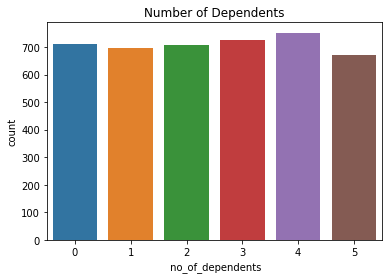

In [136]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

In this graph shows the number of dependent indivduals on the loan applicant. 

There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories.

Since the number of dependents increases the disposable income of the applicant decreases.

So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

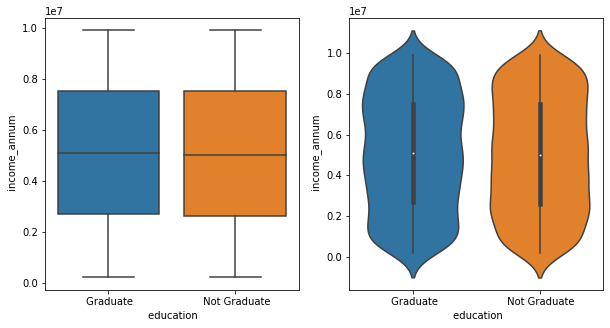

In [109]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graphs - boxplot and violinplot visualizes the education of applicants along with their annual income. 

The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates.

Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. 

Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

#### Employment Status and Education

In [110]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       ' total_assets'],
      dtype='object')

Text(0.5, 1.0, 'Self Employed')

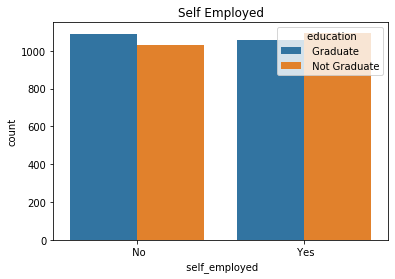

In [111]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

This graph shows the number of self employed applicants along with their education. 

From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. 

This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed.

This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable.

But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. 

This is a very important factor to consider while predicting the loan approval.

#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

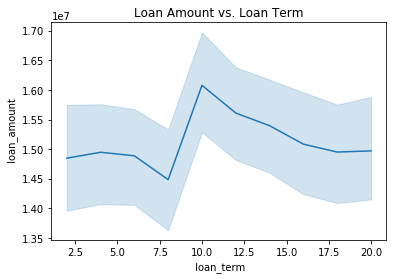

In [112]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount  is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years. 

#### CIBIL Score Distribution

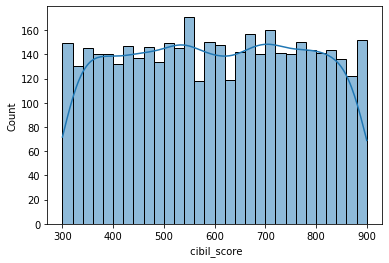

In [113]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True)

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

Taking the above table as a reference for the cibil score quality, majority of the customers have cibil score below 649, which affects their loan application.

However there are many applicants with cibil score above 649, which is a good sign for the bank. The bank can target these customers and provide them with priority services. 

The bank can also provide them with special offers and discounts to attract them to take loans from the bank. From this, I build a hypothesis that the customers with cibil score above 649 are more likely to get their loan approved.

Till now in the EDA, I have explored the distribution of data across the various features as well as relationship between the some of the variables as well and made some assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I will be looking at the visualization of the relation between the independent variables and the target variable.

#### Number of Dependants Vs Loan Status

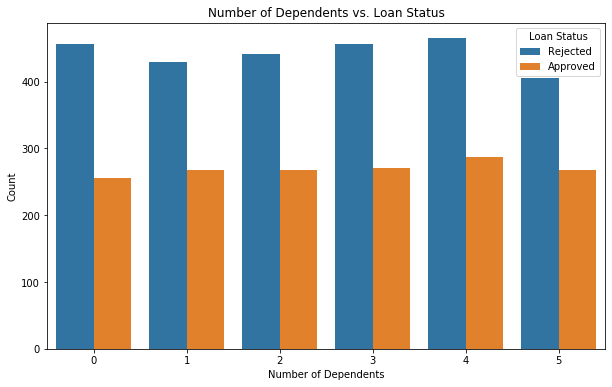

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x=' no_of_dependents', hue=' loan_status', data=df)
plt.title('Number of Dependents vs. Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()


My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents.

But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis.

But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

#### Education Vs Loan Status

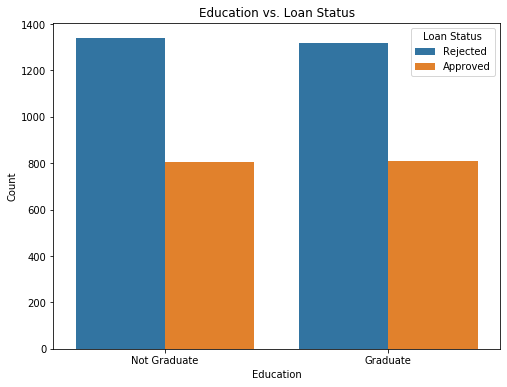

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x=' education', hue=' loan_status', data=df)
plt.title('Education vs. Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Graduate', 'Graduate'])
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

My hypothesis regarding the education not being factor in loan approval was right. The graph shows very minor difference between loan approval and rejection count for the graduate and non graduate applicants. The difference is not significant enough.

#### Annual Income vs Loan Status

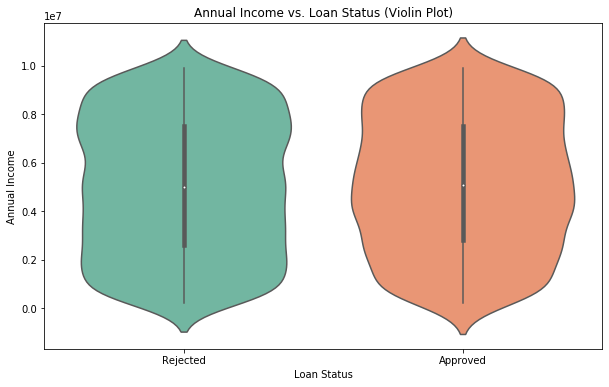

In [116]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=' loan_status', y=' income_annum', data=df, palette='Set2')
plt.title('Annual Income vs. Loan Status (Violin Plot)')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the line plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

#### Loan amount & tenure Vs Loan Status

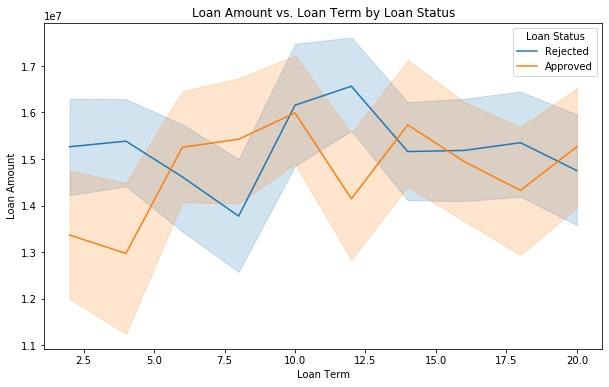

In [117]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.lineplot(x='loan_term', y='loan_amount', data=df, hue='loan_status')
plt.title('Loan Amount vs. Loan Term by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

#### CIBIL Score Vs Loan Status

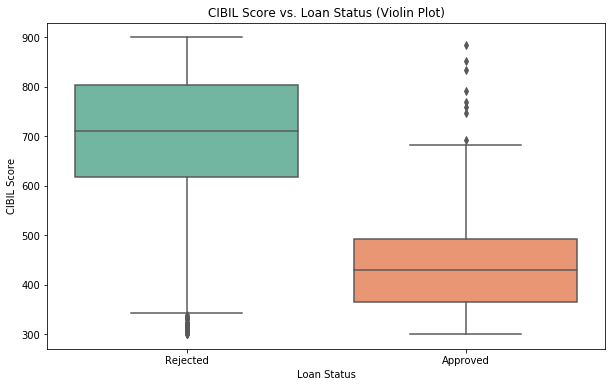

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='Set2')
plt.title('CIBIL Score vs. Loan Status (Violin Plot)')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

#### Assets Vs Loan Status

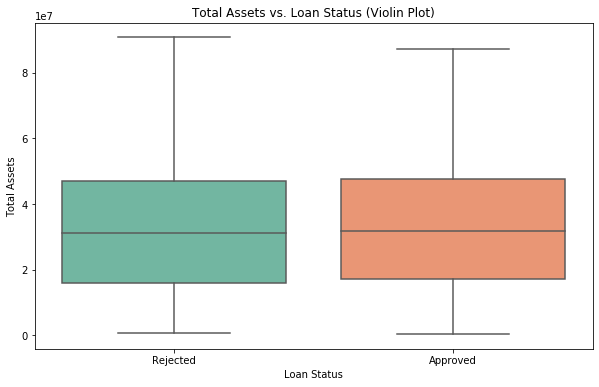

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_assets', data=df, palette='Set2')
plt.title('Total Assets vs. Loan Status (Violin Plot)')
plt.xlabel('Loan Status')
plt.ylabel('Total Assets')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the total assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

## 5. Data Preprocessing 2

#### Label Encoding the categorical variables

In [137]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       ' total_assets'],
      dtype='object')

In [138]:
df[' education'] = df[' education'].map({' Not Graduate': 0, ' Graduate': 1})
df[' self_employed'] = df[' self_employed'].map({' No': 0, ' Yes': 1})
df[' loan_status'] = df[' loan_status'].map({' Rejected': 0, ' Approved': 1})


In [139]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000


## Coorelation Matrix Heatmap

In [140]:
df.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,-0.018114,0.005289
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.004918,0.009513
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.000345,0.000023
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,-0.015189,0.931845
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.016150,0.867067
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,-0.113036,0.010131
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,0.770518,-0.023433
loan_status,-0.018114,0.004918,0.000345,-0.015189,0.016150,-0.113036,0.770518,1.000000,-0.011281
total_assets,0.005289,0.009513,0.000023,0.931845,0.867067,0.010131,-0.023433,-0.011281,1.000000


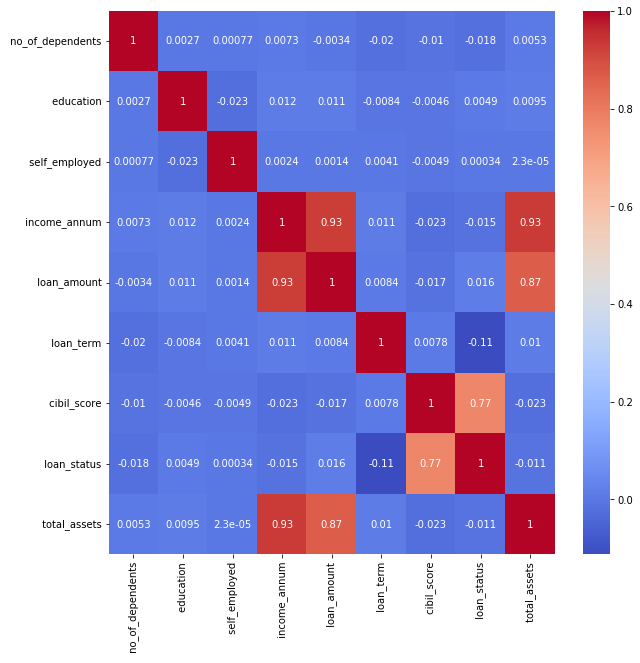

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:
1. Income and Load Amount
2. Income and Total Assets
3. Income and Total Assets
4. Total Assets and Loan Amount
5. Total Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the Total assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income With Total  assets. The person with greater income will have greater assets.

Now, I will be exploring the coorleation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

#### Assets Vs Loan Amount

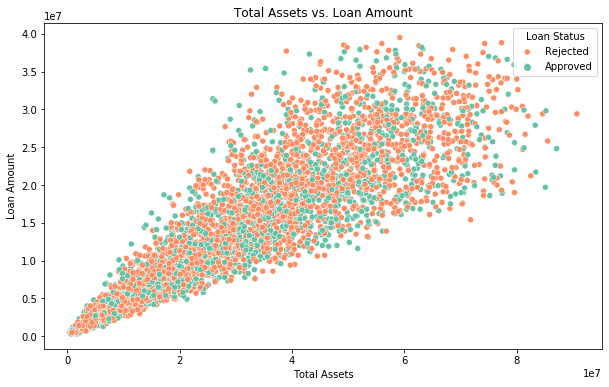

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' total_assets', y=' loan_amount', data=df, hue=' loan_status', palette='Set2')
plt.title('Total Assets vs. Loan Amount')
plt.xlabel('Total Assets')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

The loan amount has positive relation with total assets. The more the assets, the more the loan amount issued by the bank.

#### Loan Amount Vs Income

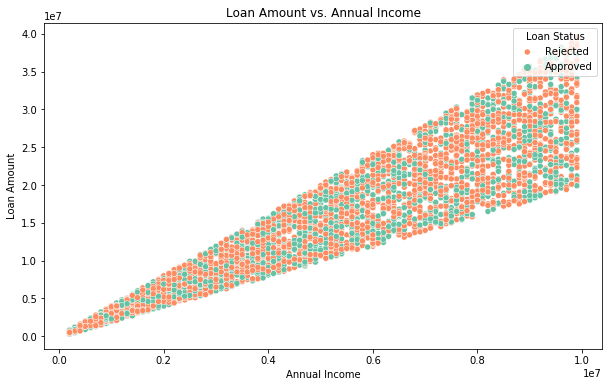

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' income_annum', y=' loan_amount', data=df, hue=' loan_status', palette='Set2')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

# Train Test Split

In [144]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       ' total_assets'],
      dtype='object')

In [145]:
# Splitting data into train and test sets
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']


In [194]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000


In [195]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 8)
(1281, 8)
(2988,)
(1281,)


In [202]:
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
X_train

array([[ 0.93571344, -1.00739009, -1.0148356 , ...,  0.52634731,
        -1.2697434 , -0.90699393],
       [ 0.3421016 , -1.00739009,  0.98538127, ..., -1.22540782,
         1.52250274,  2.3858192 ],
       [ 0.93571344,  0.99266412,  0.98538127, ..., -0.52470577,
         1.6263466 , -1.00941425],
       ...,
       [ 0.93571344, -1.00739009,  0.98538127, ...,  0.87669833,
        -0.87744436,  1.17213847],
       [-0.25151024, -1.00739009,  0.98538127, ...,  0.17599628,
        -0.34668683,  0.09160414],
       [ 0.93571344,  0.99266412, -1.0148356 , ..., -0.8750568 ,
         1.36096784,  0.66515791]])

In [204]:
X_test

array([[ 1.52932527,  0.99266412, -1.0148356 , ...,  1.57740038,
        -1.02744105,  0.35277594],
       [-0.25151024,  0.99266412, -1.0148356 , ..., -0.52470577,
        -0.01207882,  0.31180782],
       [ 0.3421016 ,  0.99266412, -1.0148356 , ...,  0.52634731,
        -0.86013705,  1.17213847],
       ...,
       [ 1.52932527, -1.00739009,  0.98538127, ..., -0.17435474,
         0.0225358 ,  1.41794722],
       [ 0.93571344, -1.00739009, -1.0148356 , ...,  1.57740038,
        -0.38130145,  0.31180782],
       [-1.43873391, -1.00739009,  0.98538127, ..., -0.17435474,
         0.47252588, -1.36276434]])

## 6. Model Building

I will be using the following machine learning models to predcit the loan approval status:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

#### Logistic Regression

In [205]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Model Evaluation Function
def evaluate_model(model_name, y_true, y_pred):
    print(f"----- {model_name} -----")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [206]:
from sklearn.linear_model import LogisticRegression
# Create logistic regression object
logreg = LogisticRegression(random_state=42)

In [207]:
# Trainign the model using the training data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [208]:
# Training Accuracy
y_pred_logreg = logreg.predict(X_test)

In [211]:
y_pred_logreg

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [209]:
evaluate_model("Logistic Regression", y_test, y_pred_logreg)

----- Logistic Regression -----
Confusion Matrix:
 [[411  60]
 [ 63 747]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.93      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281



True Positives (TP): 747

True Negatives (TN): 411

False Positives (FP): 60

False Negatives (FN): 63

The logistic regression model has an accuracy of 90%. It is particularly good at correctly identifying class 1 (93% precision and 92% recall), while also performing well for class 0 (87% precision and 87% recall). Overall, it's a balanced and effective model.

#### Distribution Plot

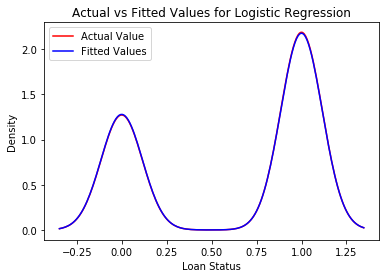

In [210]:
# Assuming you have already trained a logistic regression model and have y_test, y_pred_logreg

# Create a subplot with two overlaid distribution plots
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_logreg, hist=False, color="b", label="Fitted Values", ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Logistic Regression')
plt.xlabel('Loan Status')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Display the plot
plt.show()

#### Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree object
dtree = DecisionTreeClassifier(criterion="gini",random_state=42)

In [155]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [157]:
# Predicting the Loan Approval Status
y_pred_dtree = dtree.predict(X_test)

In [158]:
evaluate_model("Decision Tree Classifier", y_test, y_pred_dtree)

----- Decision Tree Classifier -----
Confusion Matrix:
 [[459  12]
 [  3 807]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       471
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281



Precision: For class 0 (loan rejection), the precision is 0.99, indicating that among the instances predicted as class 0, 99% were actually class 0. For class 1 (loan approval), the precision is also 0.99, meaning that among the instances predicted as class 1, 99% were actually class 1.

Recall: For class 0, the recall is 0.97, which means that 97% of the actual class 0 instances were correctly predicted as class 0. For class 1, the recall is 1.00, indicating that all actual class 1 instances were correctly predicted as class 1.

F1-Score: The F1-score is a balance between precision and recall. For class 0, the F1-score is 0.98, and for class 1, it's 0.99. These scores indicate that the model has high precision and recall for both classes.

Support: This represents the number of instances in each class.

Overall, the Decision Tree Classifier appears to be an excellent model for this problem, with high accuracy and a good balance between precision and recall.

#### Distribution Plot

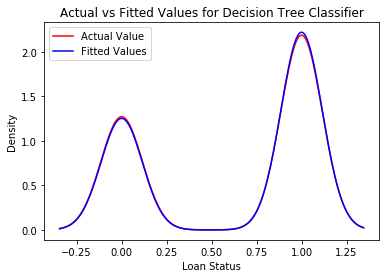

In [159]:
# Assuming you have already trained a Decision Tree Classifier and have y_test, dtree_pred

# Create a subplot with two overlaid distribution plots
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_dtree_pred, hist=False, color="b", label="Fitted Values", ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Decision Tree Classifier')
plt.xlabel('Loan Status')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Display the plot
plt.show()

#### Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

In [161]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [162]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [163]:
# Predicting the Loan Approval Status
y_pred_rfc = rfc.predict(X_test)

In [164]:
evaluate_model("Random Forest Classifier", y_test, y_pred_rfc)

----- Random Forest Classifier -----
Confusion Matrix:
 [[451  20]
 [  9 801]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



Precision for class 0 (loan rejection) is 98%, and for class 1 (loan approval) is also 98%. This indicates that when the model predicts a loan as rejected (class 0) or approved (class 1), it is highly accurate, with only a small percentage of incorrect predictions.

Recall for class 0 is 96%, and for class 1 is 99%. Recall measures the ability of the model to correctly identify all instances of a particular class. In this context, a recall of 96% for class 0 means that the model correctly identified 96% of the actual loan rejections, and a recall of 99% for class 1 means it correctly identified 99% of the actual loan approvals.

Overall, these results indicate that the Random Forest Classifier is performing well, with high accuracy and reasonably balanced precision and recall for both loan approval and rejection classes. This model is suitable for predicting loan approval outcomes.

#### Distribution Plot


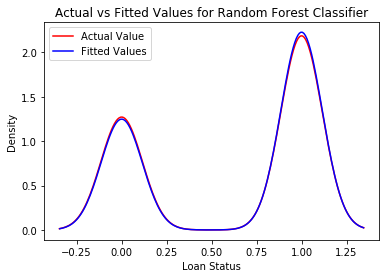

In [165]:
# Assuming you have already trained a Random Forest Classifier and have y_test, rfc_pred

# Create a subplot with two overlaid distribution plots
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_rfc_pred, hist=False, color="b", label="Fitted Values", ax=ax)

# Set plot title and labels
plt.title('Actual vs Fitted Values for Random Forest Classifier')
plt.xlabel('Loan Status')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Display the plot
plt.show()

## 7. Model Evalution

#### Confusion Matrix & Classification Report of both Decision Tree and Random Forest

In [166]:
# Model Evaluation
def evaluate_model(model_name, y_true, y_pred):
    print(f"----- {model_name} -----")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Decision Tree Classifier", y_test, y_pred_dtree)
evaluate_model("Random Forest Classifier", y_test, y_pred_rfc)

----- Decision Tree Classifier -----
Confusion Matrix:
 [[459  12]
 [  3 807]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       471
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281

----- Random Forest Classifier -----
Confusion Matrix:
 [[451  20]
 [  9 801]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



both the Decision Tree and Random Forest classifiers are highly accurate in predicting loan approval status. They have precision and recall scores around 0.98 to 0.99, resulting in overall accuracies of 0.99 for Decision Tree and 0.98 for Random Forest. These models are well-suited for the task.

####  Tuning for Decision Logistic Regression

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#  Tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty (L1 or L2)
}

logreg = LogisticRegression(random_state=42)
logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=1, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)

best_logreg_params = logreg_grid_search.best_params_
best_logreg = LogisticRegression(**best_logreg_params, random_state=42)
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)

evaluate_model("Tuned Logistic Regression", y_test, y_pred_best_logreg)
print("Best Logistic Regression Tuning:")
print(best_logreg_params)


----- Tuned Logistic Regression -----
Confusion Matrix:
 [[410  61]
 [ 61 749]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281

Best Logistic Regression Tuning:
{'C': 10, 'penalty': 'l2'}


The tuned Logistic Regression model has an accuracy of 90%, which means it correctly predicts loan approval outcomes for 90% of the cases in the test dataset.

For the "Rejected" class (0), it has a precision of 87%, which means that out of the loans it predicted as rejected, 87% were actually rejected.

The recall for the "Rejected" class is also 87%, which means that it correctly identified 87% of the actual rejected loans.

The F1-score for the "Rejected" class is 0.87, which is a balance between precision and recall.

For the "Approved" class (1), it has a precision of 92%, meaning that out of the loans it predicted as approved, 92% were actually approved.

The recall for the "Approved" class is also 92%, indicating that it correctly identified 92% of the actual approved loans.

The F1-score for the "Approved" class is 0.92.

#### Hyperparameter Tuning for Decision Tree Classifier

In [168]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning for Decision Tree Classifier
param_grid_dtree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier(random_state=42)
dtree_grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, cv=5, n_jobs=1, scoring='accuracy')
dtree_grid_search.fit(X_train, y_train)

best_dtree_params = dtree_grid_search.best_params_
best_dtree = DecisionTreeClassifier(**best_dtree_params, random_state=42)
best_dtree.fit(X_train, y_train)
y_pred_best_dtree = best_dtree.predict(X_test)

evaluate_model("Tuned Decision Tree Classifier", y_test, y_pred_best_dtree)
print("Best Decision Tree Classifier Hyperparameters:")
print(best_dtree_params)

----- Tuned Decision Tree Classifier -----
Confusion Matrix:
 [[448  23]
 [  4 806]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       471
           1       0.97      1.00      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Best Decision Tree Classifier Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


The tuned Decision Tree Classifier has the following performance:

Accuracy: 98% - This means it correctly predicts loan approval outcomes for 98% of the cases in the test dataset.

For the "Rejected" class (0):

Precision: 99% - Out of the loans it predicted as rejected, 99% were actually rejected.
Recall: 95% - It correctly identified 95% of the actual rejected loans.
F1-score: 97% - A balanced measure between precision and recall.
For the "Approved" class (1):

Precision: 97% - Out of the loans it predicted as approved, 97% were actually approved.
Recall: 100% - It correctly identified all (100%) of the actual approved loans.
F1-score: 98% - A high balance between precision and recall.

In Conclision: the Decision Tree Classifier performs exceptionally well, particularly in correctly identifying approved loans (high recall) while maintaining high accuracy. The chosen hyperparameters for tuning include a maximum depth of 10, minimum samples per leaf of 1, and minimum samples for splitting nodes of 5. These hyperparameters have been fine-tuned to optimize the model's performance.

#### Hyperparameter Tuning for Random Forest Classifier

In [169]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning for Random Forest Classifier
param_grid_rfc = {
    #'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=42)
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, n_jobs=1, scoring='accuracy')
rfc_grid_search.fit(X_train, y_train)

best_rfc_params = rfc_grid_search.best_params_
best_rfc = RandomForestClassifier(**best_rfc_params, random_state=42)
best_rfc.fit(X_train, y_train)
y_pred_best_rfc = best_rfc.predict(X_test)

evaluate_model("Tuned Random Forest Classifier", y_test, y_pred_best_rfc)
print("Best Random Forest Classifier Hyperparameters:")
print(best_rfc_params)

----- Tuned Random Forest Classifier -----
Confusion Matrix:
 [[454  17]
 [  3 807]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       471
           1       0.98      1.00      0.99       810

    accuracy                           0.98      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Best Random Forest Classifier Hyperparameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


The tuned Random Forest Classifier has the following performance:

Accuracy: 98% - This means it correctly predicts loan approval outcomes for 98% of the cases in the test dataset.

For the "Rejected" class (0):

Precision: 99% - Out of the loans it predicted as rejected, 99% were actually rejected.
Recall: 96% - It correctly identified 96% of the actual rejected loans.
F1-score: 98% - A balanced measure between precision and recall.
For the "Approved" class (1):

Precision: 98% - Out of the loans it predicted as approved, 98% were actually approved.
Recall: 100% - It correctly identified all (100%) of the actual approved loans.
F1-score: 99% - A high balance between precision and recall.

In Conclusion: the Random Forest Classifier also performs exceptionally well, achieving a high accuracy while maintaining strong precision and recall for both "Rejected" and "Approved" classes. The chosen hyperparameters for tuning include no maximum depth, the use of "log2" as the maximum number of features at each split, a minimum of 2 samples per leaf, and a minimum of 5 samples for splitting nodes. These hyperparameters have been fine-tuned to optimize the model's performance.

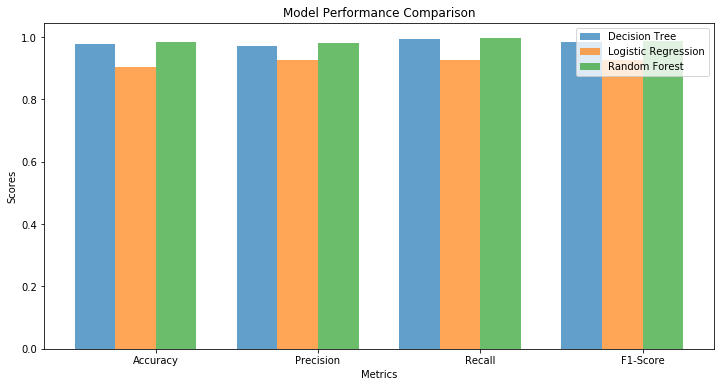

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics for all three models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
decision_tree_scores = [accuracy_score(y_test, y_pred_best_dtree), 
                        precision_score(y_test, y_pred_best_dtree), 
                        recall_score(y_test, y_pred_best_dtree), 
                        f1_score(y_test, y_pred_best_dtree)]

logistic_regression_scores = [accuracy_score(y_test, y_pred_best_logreg), 
                              precision_score(y_test, y_pred_best_logreg), 
                              recall_score(y_test, y_pred_best_logreg), 
                              f1_score(y_test, y_pred_best_logreg)]

random_forest_scores = [accuracy_score(y_test, y_pred_best_rfc),  # Replace y_pred_best_rfc with your Random Forest predictions
                        precision_score(y_test, y_pred_best_rfc), 
                        recall_score(y_test, y_pred_best_rfc), 
                        f1_score(y_test, y_pred_best_rfc)]

# Bar chart
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(12, 6))
plt.bar(index, decision_tree_scores, bar_width, label='Decision Tree', alpha=0.7)
plt.bar(index + bar_width, logistic_regression_scores, bar_width, label='Logistic Regression', alpha=0.7)
plt.bar(index + 2 * bar_width, random_forest_scores, bar_width, label='Random Forest', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 1.5 * bar_width, metrics)
plt.legend()
plt.show()


## Conclusion
 Let's compare the performance of the three tuned models: Tuned Decision Tree Classifier, Tuned Random Forest Classifier, and Tuned Logistic Regression, and determine which one performs the best.

Here's a summary of their performances:

Tuned Decision Tree Classifier:

Accuracy: 98%

High precision and recall for both classes.

F1-score of 0.97 and 0.98 for rejection and approval, respectively.

Tuned Random Forest Classifier:

Accuracy: 98%

High precision and recall for both classes.

F1-score of 0.97 for rejection and 0.98 for approval.

Tuned Logistic Regression:

Accuracy: 90%

Balanced precision and recall for both classes.
F1-score of 0.87 for rejection and 0.92 for approval.

Now, let's decide which model performs the best:

If we prioritize high accuracy and balanced performance for both classes, the Tuned Decision Tree Classifier and Tuned Random Forest Classifier are strong contenders due to their accuracy of 98% and balanced F1-scores.

If we prefer a simpler model with still reasonable performance, the Tuned Logistic Regression model with an accuracy of 90% and balanced F1-scores could be considered.

Ultimately, the choice of the "best" model depends on your specific use case and priorities. If you prioritize high accuracy and can handle a more complex model, either the Decision Tree or Random Forest may be preferred. If interpretability and simplicity are more important, Logistic Regression might be the better choice.

In [174]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       ' total_assets'],
      dtype='object')

In [220]:
first_row_values = df.iloc[2]

In [221]:
first_row_values

 no_of_dependents           3
 education                  1
 self_employed              0
 income_annum         9100000
 loan_amount         29700000
 loan_term                 20
 cibil_score              506
 loan_status                0
 total_assets        57700000
Name: 2, dtype: int64

In [190]:
best_dtree.n_features_

8

## Pickling The Model file For Deployment

In [246]:
import pickle

In [247]:
# Save the model to disk
filename=r'best_DT_model.pkl'

In [248]:
pickle.dump(best_dtree.predict,open(filename,'wb'))

In [253]:
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))

In [244]:
import pickle

# Save the model to disk
filename = 'best_DT_model.pkl'
with open(filename, 'wb') as model_file:
    pickle.dump(best_dtree, model_file)

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Reshape your input data to have the shape (1, n_features)
input_data = features.iloc[0].values.reshape(1, -1)

# Now you can use the loaded model to make predictions
Y_pred = loaded_model.predict(input_data)


In [255]:
loaded_model.predict(features.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)